In [72]:
import numpy as np
from EM import NiftiManager, Evaluate, EM

# To allow auto reload to this notebook after modifying any external file imported
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
NM                      = NiftiManager()
EVAL                    = Evaluate()

2023-11-06 22:00:10.742 | INFO     | EM:fit:645 - Fitting the algorithm with 20 iterations.
2023-11-06 22:00:10.833 | INFO     | EM:initialize_parameters:390 - Initializing model parameters using 'kmeans'.
2023-11-06 22:00:11.699 | INFO     | EM:fit:670 - Iterations performed: 5. Displaying the segmentation result..
2023-11-06 22:00:11.721 | INFO     | EM:correct_pred_labels:610 - Finished segmentation. Correcting prediction labels...


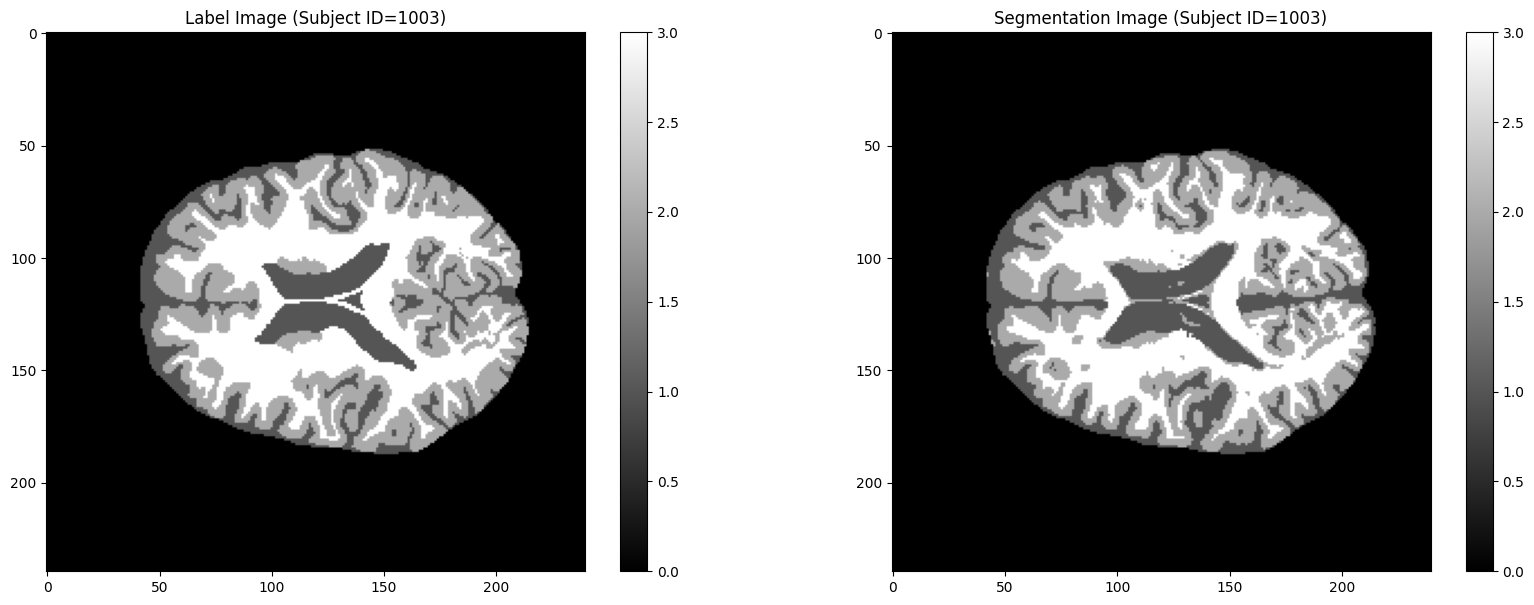

In [49]:
'''
To correct the labels, we must uncommend the prior label object specified for this dataset, where csf=1, wm=2, gm=3.
'''

# t1_path         = '../Lab 1/P2_data/5/T1.nii'
# t2_path         = '../Lab 1/P2_data/5/T2_FLAIR.nii'
# labels_gt_file  = '../Lab 1/P2_data/5/LabelsForTesting.nii'

# # read the labels gt file
# labels_nifti, _ = NM.load_nifti(labels_gt_file)

# # initialize EM for multi-modal segmentation
# ExpectationMaximization = EM(
#     K=3,
#     params_init_type = "kmeans",
#     modality='multi'
# )

# # perform EM algorithm
# segmentation_result = ExpectationMaximization.fit(
#     n_iterations = 20,
#     labels_gt_file = labels_gt_file,
#     t1_path = t1_path,
#     t2_path = t2_path,
#     correct_labels = True,
#     # tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv'
# )
# NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=24)

KMeans Init 

2023-11-08 22:21:41.205 | INFO     | EM:fit:662 - Fitting the algorithm with 20 iterations.
2023-11-08 22:21:41.618 | INFO     | EM:initialize_parameters:399 - Initializing model parameters using 'kmeans'.
2023-11-08 22:21:42.478 | INFO     | EM:fit:687 - Iterations performed: 0. Displaying the segmentation result..
2023-11-08 22:21:42.864 | INFO     | EM:correct_pred_labels:627 - Finished segmentation. Correcting prediction labels...


CSF DICE:  0.27417885474283593
GM DICE:  0.7457620531289829
WM DICE:  0.8927316222905702


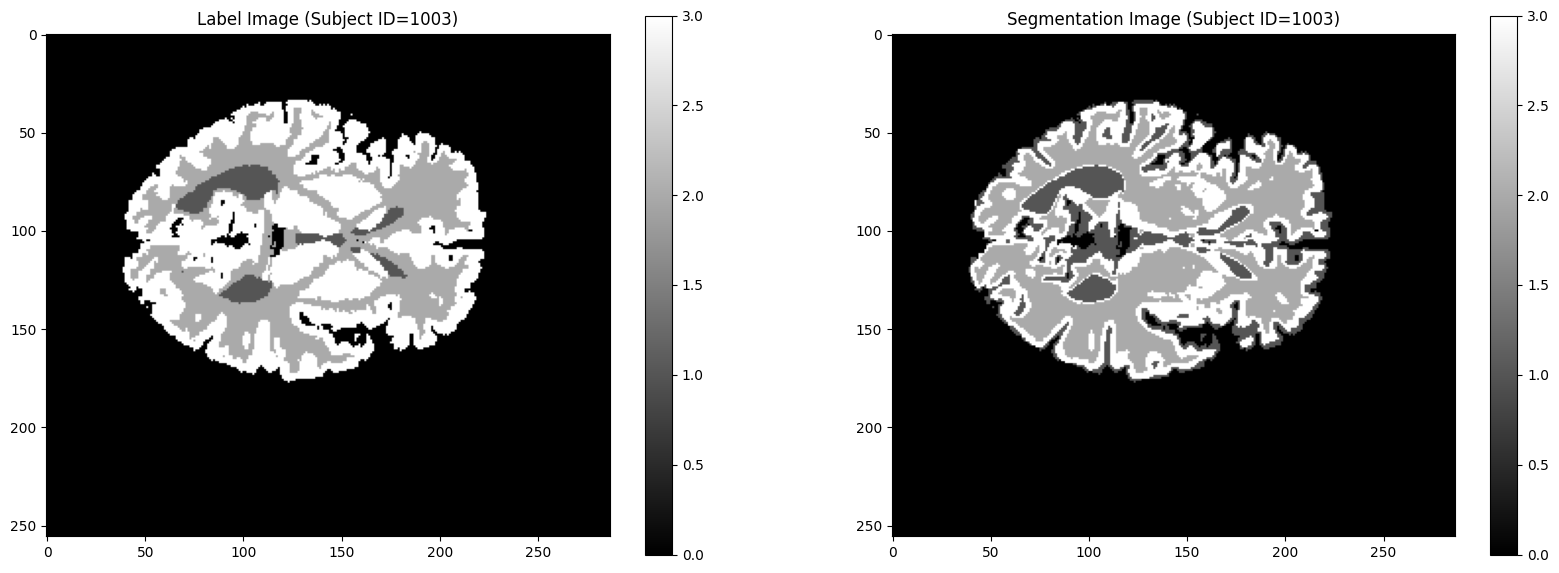

In [75]:
t1_path         = 'output/images/output_mean_intensity/1125/result.1.nii'
labels_gt_file  = 'output/labels/output_mean_intensity/1125/result.nii'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "kmeans",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True
)


# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)

Tissue Models Init 

2023-11-08 22:21:53.453 | INFO     | EM:fit:662 - Fitting the algorithm with 20 iterations.
2023-11-08 22:21:53.859 | INFO     | EM:initialize_parameters:399 - Initializing model parameters using 'tissue_models'.
2023-11-08 22:22:14.841 | INFO     | EM:fit:687 - Iterations performed: 20. Displaying the segmentation result..
2023-11-08 22:22:15.213 | INFO     | EM:correct_pred_labels:627 - Finished segmentation. Correcting prediction labels...


CSF DICE:  0.7359462941614412
GM DICE:  0.8542702774052789
WM DICE:  0.8341752974568084


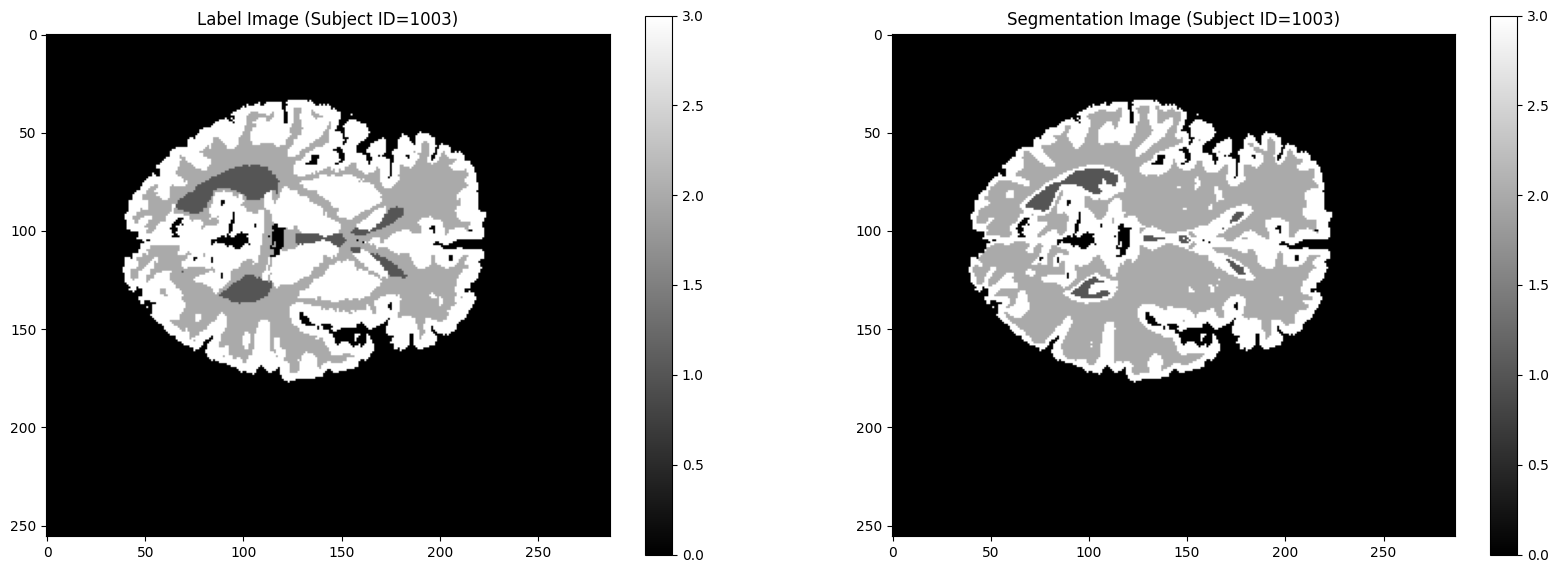

In [76]:
t1_path         = 'output/images/output_mean_intensity/1125/result.1.nii'
labels_gt_file  = 'output/labels/output_mean_intensity/1125/result.nii'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv'
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)

In [77]:
atlas_csf, _ = NM.load_nifti('atlas_outputs/mean_csf.nii.gz')
atlas_wm, _  = NM.load_nifti('atlas_outputs/mean_wm.nii.gz')
atlas_gm, _  = NM.load_nifti('atlas_outputs/mean_gm.nii.gz')

# NM.show_mean_volumes(atlas_csf, atlas_wm, atlas_gm, slices=[128])

Atlas Init

2023-11-08 22:24:56.343 | INFO     | EM:fit:662 - Fitting the algorithm with 20 iterations.
2023-11-08 22:24:56.753 | INFO     | EM:initialize_parameters:399 - Initializing model parameters using 'atlas'.
2023-11-08 22:25:04.222 | INFO     | EM:fit:687 - Iterations performed: 20. Displaying the segmentation result..
2023-11-08 22:25:04.645 | INFO     | EM:correct_pred_labels:627 - Finished segmentation. Correcting prediction labels...


CSF DICE:  0.807918316315815
GM DICE:  0.921227904874355
WM DICE:  0.876872730849124


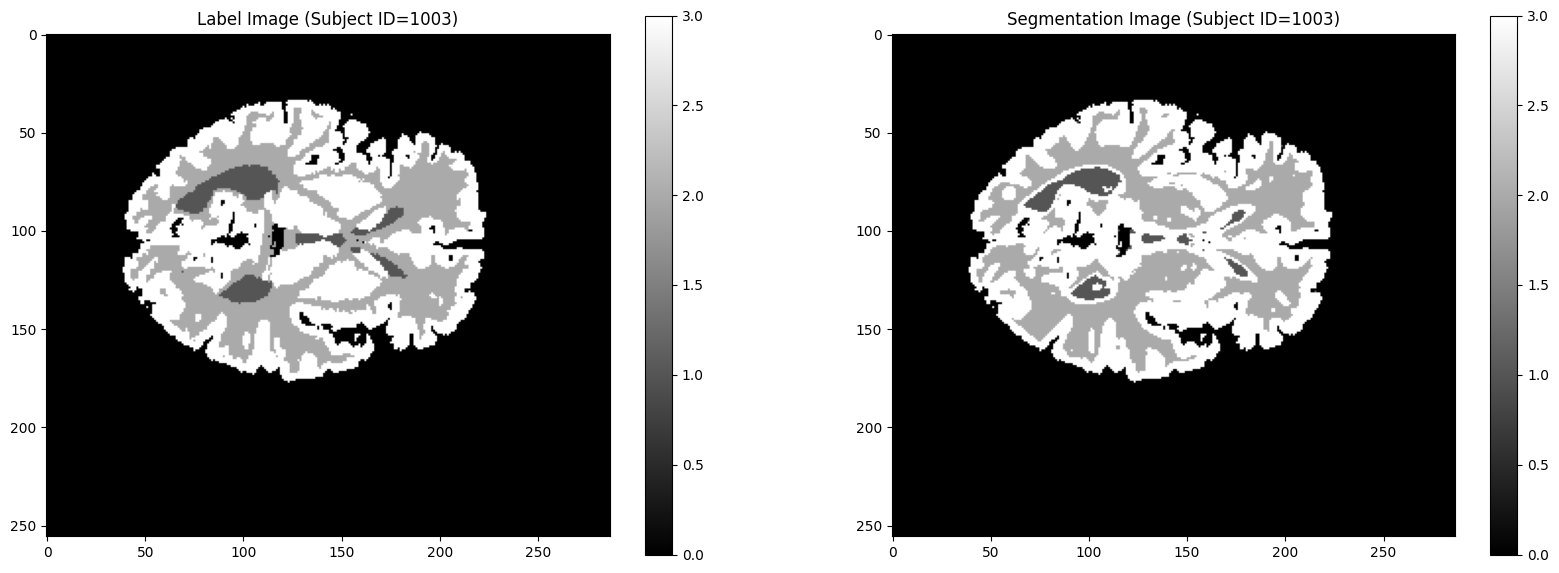

In [85]:
###############
# TODO ASK, is it normal that csf is 0 dice? Increased when we used both atlas and tissue map init!
# show different subjects, subject 1003, 1004 !! subject 1005 gives identical result to tissue_models_atlas?
###############


t1_path         = 'output/images/output_mean_intensity/1125/result.1.nii'
labels_gt_file  = 'output/labels/output_mean_intensity/1125/result.nii'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "atlas",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    atlas_csf = atlas_csf,
    atlas_wm = atlas_wm,
    atlas_gm = atlas_gm
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)

Initializing using both tissue models and atlases

2023-11-08 22:24:45.887 | INFO     | EM:fit:662 - Fitting the algorithm with 20 iterations.
2023-11-08 22:24:46.424 | INFO     | EM:initialize_parameters:399 - Initializing model parameters using 'tissue_models_atlas'.
2023-11-08 22:24:54.942 | INFO     | EM:fit:687 - Iterations performed: 20. Displaying the segmentation result..
2023-11-08 22:24:55.338 | INFO     | EM:correct_pred_labels:627 - Finished segmentation. Correcting prediction labels...


CSF DICE:  0.7822337774888114
GM DICE:  0.9233328103610993
WM DICE:  0.8923732261145383


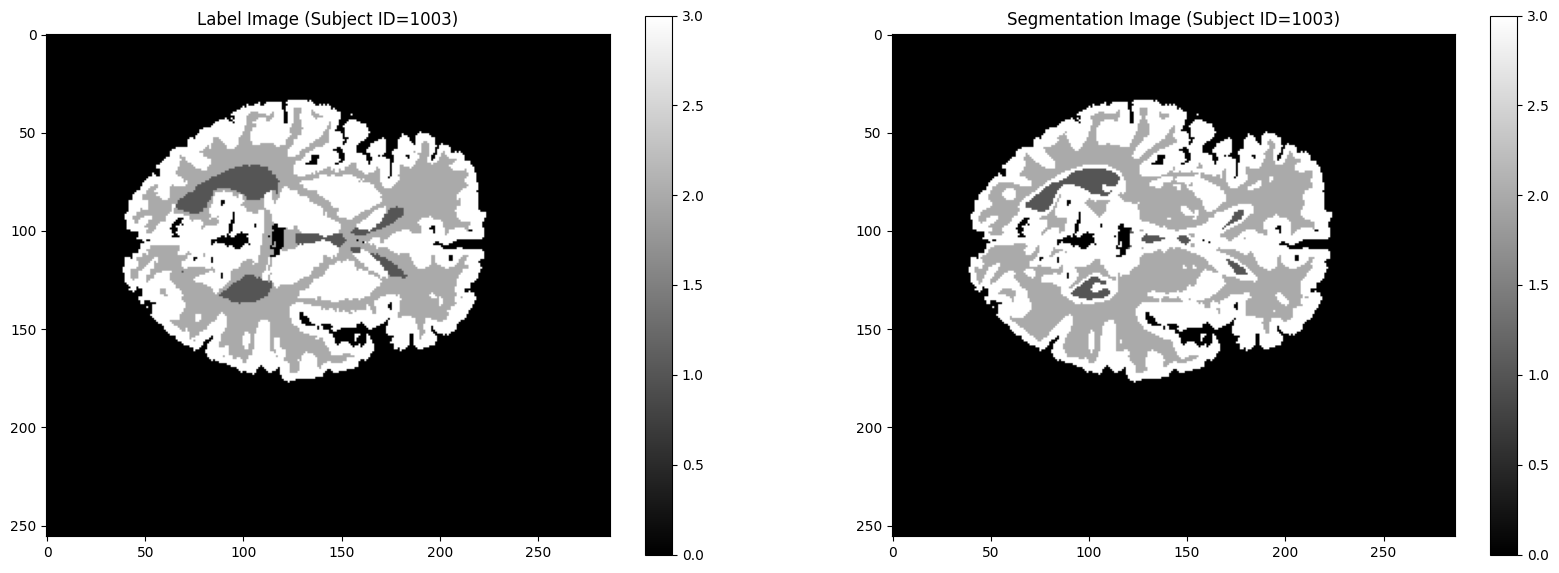

In [84]:
t1_path         = 'output/images/output_mean_intensity/1125/result.1.nii'
labels_gt_file  = 'output/labels/output_mean_intensity/1125/result.nii'

# initialize EM for multi-modal segmentation
ExpectationMaximization = EM(
    K=3,
    params_init_type = "tissue_models_atlas",
    modality='single'
)

# perform EM algorithm
segmentation_result = ExpectationMaximization.fit(
    n_iterations = 20,
    labels_gt_file = labels_gt_file,
    t1_path = t1_path,
    correct_labels = True,
    tissue_model_csv_dir = 'atlas_outputs/tissue_model_probability_data.csv',
    atlas_csf = atlas_csf,
    atlas_wm = atlas_wm,
    atlas_gm = atlas_gm
)

# read the labels gt file
labels_nifti, _ = NM.load_nifti(labels_gt_file)

segmentation_tissue_model_bg  = segmentation_result == 0
segmentation_tissue_model_csf = segmentation_result == 1
segmentation_tissue_model_wm  = segmentation_result == 2
segmentation_tissue_model_gm  = segmentation_result == 3

labels_nifti_CSF              = labels_nifti == 1
labels_nifti_WM               = labels_nifti == 2
labels_nifti_GM               = labels_nifti == 3

dice_csf    = EVAL.calc_dice_coefficient(labels_nifti_CSF, segmentation_tissue_model_csf)
dice_wm     = EVAL.calc_dice_coefficient(labels_nifti_WM, segmentation_tissue_model_wm)
dice_gm     = EVAL.calc_dice_coefficient(labels_nifti_GM, segmentation_tissue_model_gm)

print("CSF DICE: ", dice_csf)
print("GM DICE: ", dice_gm)
print("WM DICE: ", dice_wm)

NM.show_label_seg_nifti(labels_nifti, segmentation_result, 1003, slice=128)

In [80]:
# t1_path         = 'output/images/output_mean_intensity/1003/result.1.nii'
# labels_gt_file  = 'output/labels/output_mean_intensity/1003/result.nii'

# # read the labels gt file
# labels_nifti, _ = NM.load_nifti(labels_gt_file)
# t1_nifti, _     = NM.load_nifti(t1_path)

# # csf = 1, wm=2, gm=3

# print(
#     np.mean(t1_nifti[labels_nifti == 3].flatten())
# )

# # mean csf == 1, 687.443134098841
# # mean wm  == 2, 1590.811034520944
# # mean gm  == 3, 1035.444058096885

In [81]:
# t1_path         = '../Lab 1/P2_data/1/T1.nii'
# t2_path         = '../Lab 1/P2_data/1/T2_FLAIR.nii'
# labels_gt_file  = '../Lab 1/P2_data/1/LabelsForTesting.nii'

# # read the labels gt file
# labels_nifti, _ = NM.load_nifti(labels_gt_file)
# t1_nifti, _     = NM.load_nifti(t1_path)

# print(
#     np.mean(t1_nifti[labels_nifti == 3].flatten())
# )


# # it is different in the first project !! 
# # mean csf == 1, 61.226170958403166
# # mean gm  == 2, 152.62869550195683
# # mean wm  == 3, 214.5741427470622